In [3]:
import scipy
from sentence_transformers import SentenceTransformer, util
import numpy as np
from PIL import Image
import os
from numpy import *
import cv2
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import transforms
import tensorflow as tf

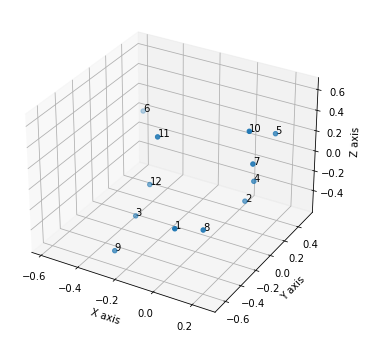

In [6]:
class ResNetEncoder(nn.Module):
    def __init__(self, num_classes, pretrained=True):
        super(ResNetEncoder, self).__init__()
        self.resnet = models.resnet50(pretrained=pretrained)
        self.resnet.fc = nn.Linear(2048, num_classes)

    def forward(self, x):
        x = self.resnet.conv1(x)
        x = self.resnet.bn1(x)
        x = self.resnet.relu(x)
        x = self.resnet.maxpool(x)

        x = self.resnet.layer1(x)
        x = self.resnet.layer2(x)
        x = self.resnet.layer3(x)
        x = self.resnet.layer4(x)

        x = self.resnet.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.resnet.fc(x)
        return x

list_embeded = []
for i in range(1,13):
    file_name = "emojis/"+str(i)+".png"
    image_rgb = cv2.imread(file_name, cv2.IMREAD_COLOR)
    data = np.array(image_rgb)
    data = transforms.ToTensor()(data)
    encoder = ResNetEncoder(num_classes=3)
    list_embeded.append(encoder(data.unsqueeze(0)))

list_embeded_ = [[float(a[0][0]),float(a[0][1]),float(a[0][2])] for a in list_embeded]

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming 'points' is your list of points with x, y, z coordinates
points = np.array(list_embeded_)  # Replace with your actual list of points

# Extracting x, y, z coordinates
x_coords = points[:, 0]
y_coords = points[:, 1]
z_coords = points[:, 2]

# Creating a new figure and a 3D subplot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting the scatter plot
ax.scatter(x_coords, y_coords, z_coords)

for i, (x, y, z) in enumerate(zip(x_coords, y_coords, z_coords)):
    ax.text(x, y, z, '%s' % (str(i+1)), size=10, zorder=1, color='k')


# Setting labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Showing the plot
plt.savefig('plot.png',transparent = True)
plt.show()


